# Bootstrapping

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Data
## loading the data

Penn = pd.read_csv("C:/Users/Alvaro/Documents/PUCP/Ciclo 2022-1/ML.2022.1/data/penn_jae.dat" , sep="\s", engine="python")
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
2,10551,5,18,6,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,10831,5,27,27,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
13910,10817,4,4,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
13911,10691,0,27,27,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,NaN


In [3]:
# Subset T4

Penn = Penn[ (Penn["tg"] == 4) | (Penn["tg"] == 0) ]
print(Penn.shape)

(5099, 24)


In [4]:
Penn.dtypes

abdt             int64
tg               int64
inuidur1         int64
inuidur2         int64
female           int64
black            int64
hispanic         int64
othrace          int64
dep              int64
q1               int64
q2               int64
q3               int64
q4               int64
Unnamed: 13      int64
q5               int64
q6               int64
recall           int64
agelt35          int64
agegt54          int64
durable          int64
nondurable       int64
lusd             int64
husd             int64
muld           float64
dtype: object

In [5]:
# Transform inuidur1 to log
Penn["log_inuidur1"] = np.log(Penn["inuidur1"])

#Dependent Variable
Penn["T4"]=(Penn[["tg"]]==4).astype(int)

#Create Category variable
Penn["dep"] = Penn["dep"].astype("category")

Penn.head()

C:\Users\Alvaro\AppData\Local\Temp/ipykernel_26668/4251425558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Penn["log_inuidur1"] = np.log(Penn["inuidur1"])
C:\Users\Alvaro\AppData\Local\Temp/ipykernel_26668/4251425558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Penn["T4"]=(Penn[["tg"]]==4).astype(int)
C:\Users\Alvaro\AppData\Local\Temp/ipykernel_26668/4251425558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,T4
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,1,0,NaN,2.890372,0
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,0.000000,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,3.295837,0
11,10607,4,9,9,0,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,2.197225,1
12,10831,0,27,27,0,0,0,0,1,0,...,0,1,1,0,1,0,0,NaN,3.295837,0


In [6]:
Penn.dtypes

abdt               int64
tg                 int64
inuidur1           int64
inuidur2           int64
female             int64
black              int64
hispanic           int64
othrace            int64
dep             category
q1                 int64
q2                 int64
q3                 int64
q4                 int64
Unnamed: 13        int64
q5                 int64
q6                 int64
recall             int64
agelt35            int64
agegt54            int64
durable            int64
nondurable         int64
lusd               int64
husd               int64
muld             float64
log_inuidur1     float64
T4                 int32
dtype: object

In [7]:
# Function to get sample.

def get_indices(Penn,num_samples):
    return  np.random.choice(Penn.index, num_samples, replace=True)

In [8]:
get_indices(Penn,Penn.shape[0])

array([11586,  1066,   383, ...,  9105,  1617,  1667], dtype=int64)

In [9]:
# Define function to get estimates from our model equation.

def get_estimates(Penn,index):
    X = Penn[["T4","female","black","othrace","dep","q2","q3","q4","q5","q6","agelt35","agegt54","durable","lusd","husd"]].loc[index]
    y = Penn["log_inuidur1"].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    coef = lr.coef_
    return [coef]

In [10]:
# Bootstrap process

def boot(Penn,func,R):

    #We create empty list of the variables of interest
    T4 = []
    female = []  
    black = []

    # Loop for each variable
    for i in range(R):
        T4.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][0]) # index [] represents position in equation
        female.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][1]) 
        black.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][2]) 

        
    T4_statistics = {"estimated_mean":np.mean(T4),"std_error":np.std(T4)}   
    female_statistics = {"estimated_mean":np.mean(female),"std_error":np.std(female)}
    black_statistics = {"estimated_mean":np.mean(black),"std_error":np.std(black)}   

    return {"T4_estimator":T4_statistics,"female_estimator":female_statistics, "black_estimator": black_statistics} 

In [11]:
# 1000 bootstraps

results = boot(Penn,get_estimates,1000)
results

{'T4_estimator': {'estimated_mean': -0.07464590334824447,
  'std_error': 0.03547113286146816},
 'female_estimator': {'estimated_mean': 0.13790087541896928,
  'std_error': 0.03527718162201859},
 'black_estimator': {'estimated_mean': -0.3069426122451348,
  'std_error': 0.06020740224524805}}

In [12]:
# Table of results

df =pd.DataFrame.from_dict(results,orient='index')
df

,estimated_mean,std_error
T4_estimator,-0.074646,0.035471
female_estimator,0.137901,0.035277
black_estimator,-0.306943,0.060207


# Comparative models

In [13]:
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [14]:
rdata_read = pyreadr.read_r("C:/Users/Alvaro/Documents/ML/data/cps2012.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape

(29217, 23)

In [15]:
data = data.drop( 'year', axis = 1)

In [16]:
data.head()

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False


(0.0, 20000.0)

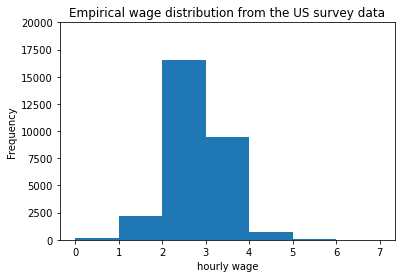

In [17]:
# Log Wage
plt.hist(data.lnw , bins = np.arange(0, 8, 1) )
plt.xlabel('hourly wage')
plt.ylabel('Frequency')
plt.title( 'Empirical wage distribution from the US survey data' )
plt.ylim((0, 20000))

### Analysis

1. Data splitting process

In [18]:
from numpy.random import default_rng

In [19]:
nrow = data.shape[0]
length = int(nrow*(3/4)) #  divide 75% for train and 25% for test

In [20]:

random.seed(30)
rng = default_rng()

#size = length to use all values from sample train
training = rng.choice(nrow, size = length, replace=False) # random sample
training_bool = data.index.isin( training )

#data_train = data.iloc[training,:] # Alternative

data_train = data[training_bool]
data_test = data[~training_bool] # for test use the complement of the data

In [21]:
data_train.shape

(21912, 22)

In [22]:
data_test.shape

(7305, 22)

2. Make matrix of results


In [23]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy   # modelmatrix version of phyton

In [24]:
# Define Basic Model and Flex Model

formula_basic = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
    
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3)**2"


In [25]:
# BASIC MODEL

#get matrix of y an x for train data
y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')

#get matrix of y and X for for test data
y_basic_test, model_X_basic_test = patsy.dmatrices(formula_basic, data_test, return_type='dataframe')
p_basic = model_X_basic_train.shape[ 1 ]

In [26]:
# FLEX MODEL

#get matrix of y an X for train data
y_flex_train, model_X_flex_train = patsy.dmatrices(formula_flex, data_train, return_type='dataframe')

#get matrix of y and x for test data
y_flex_test, model_X_flex_test = patsy.dmatrices(formula_flex, data_test, return_type='dataframe')
p_flex = model_X_flex_train.shape[ 1 ]

In [27]:
# Number of regressor per model
print(p_basic)
print(p_flex)

17
137


In [28]:
# Y is the same for both models basic and flex.

Y_train = data_train['lnw']
Y_test = data_test['lnw']

### Linear Models

In this section we present the basic and flex regressions on the following linear models:
OLS, Lasso (HDM), Lasso - CV ,Elastic Net - CV, Ridge lasso - CV.

#### OLS

In [29]:
#Basic Model

lm_basic = sm.OLS( Y_train, model_X_basic_train )
fit_lm_basic = lm_basic.fit()

# Compute the Out-Of-Sample Performance (capacidad de ajuste o prediccion)
yhat_lm_basic = fit_lm_basic.predict( model_X_basic_test )

print( f"The mean squared error (MSE) using the basic model is equal to , {np.mean((Y_test-yhat_lm_basic)**2)} ") # MSE OLS (basic model)    

The mean squared error (MSE) using the basic model is equal to , 0.40290825948606224 


In [30]:
# MSE and standard error

resid_basic = (Y_test-yhat_lm_basic)**2 #residuals squared

MSE_lm_basic = sm.OLS( resid_basic , np.ones( resid_basic.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_basic

Coef.       0.402908
Std.Err.    0.021881
Name: const, dtype: float64

In [31]:
# R-squared
R2_lm_basic = 1 - ( MSE_lm_basic[0]/Y_test.var() ) # R square formula
print( f"The R^2 using the basic model is equal to, {R2_lm_basic}" )  

The R^2 using the basic model is equal to, 0.11930544627657436


In [32]:
# OLS
# Flex Model

lm_flex = sm.OLS( Y_train, model_X_flex_train )
fit_lm_flex = lm_flex.fit()

yhat_lm_flex = fit_lm_flex.predict( model_X_flex_test )

print( f"The mean squared error (MSE) using theflexible model is equal to , {np.mean((Y_test-yhat_lm_flex)**2)} ") 

The mean squared error (MSE) using theflexible model is equal to , 0.3468803977008788 


In [33]:
# MSE and Standard error

resid_flex = (Y_test-yhat_lm_flex)**2

MSE_lm_flex = sm.OLS( resid_flex , np.ones( resid_flex.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_flex

Coef.       0.346880
Std.Err.    0.022282
Name: const, dtype: float64

In [34]:
R2_lm_flex = 1 - ( MSE_lm_flex[0]/Y_test.var() )

print( f"The R^2 using the flex model is equal to, {R2_lm_flex}" ) 

The R^2 using the flex model is equal to, 0.2417736051421303


#### Lasso, Ridge and Elastic Net

In [35]:
import hdmpy

In [36]:
# Lasso HDM
fit_rlasso = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )


C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\func

#### Basic Model

Lasso and Post-Lasso

In [37]:
# We have to normalize the varibles. 
# this always do when working with data with significant different ragen such as age and wealth. 
# to do that we dierenciate the betas with their mean. 

# Getting mean of each variable (column)
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean (standarize)
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T) # each column has the mean for aeach varialbe

# Getting the significant variables
x1_est_rlasso = new_x1[ :, fit_rlasso.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables (betas different from zero)
beta_rlasso = fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso = (x1_est_rlasso @ beta_rlasso) + np.mean( Y_test.to_numpy() )
residuals_rlasso = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso

In [38]:
# Post Lasso
# same process for Post Lasso

# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post = new_x1[ :, fit_rlasso_post.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post = fit_rlasso_post.est['beta'].loc[ fit_rlasso_post.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post = (x1_est_rlasso_post @ beta_rlasso_post) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post

In [39]:
# MSE for lasso and post lasso of Basic Model

MSE_lasso = sm.OLS( ( residuals_rlasso )**2 , np.ones( yhat_rlasso.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post = sm.OLS( ( residuals_rlasso_post )**2  , np.ones( yhat_rlasso_post.size )  ).fit().summary2().tables[1].round(3)

In [40]:
# R squared for lasso and post lasso of Basic Model

R2_lasso = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post = 1 - MSE_lasso_post.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso},for lasso and {R2_lasso_post} for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.11461202506471957,for lasso and 0.11461202506471957 for post-lasso


#### Flex Model

Lasso and Post-Lasso

In [41]:
fit_rlasso_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\func

In [42]:
# Lasso for flex model

# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_flex = new_x1[ :, fit_rlasso_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_flex = fit_rlasso_flex.est['beta'].loc[ fit_rlasso_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_flex = (x1_est_rlasso_flex @ beta_rlasso_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_flex

In [43]:
# Post lasso for flex model

# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post_flex = new_x1[ :, fit_rlasso_post_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post_flex = fit_rlasso_post_flex.est['beta'].loc[ fit_rlasso_post_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post_flex = (x1_est_rlasso_post_flex @ beta_rlasso_post_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post_flex

In [44]:
# MSE for lasso and post lasso of Flex Model
MSE_lasso_flex = sm.OLS( ( residuals_rlasso_flex )**2 , np.ones( yhat_rlasso_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post_flex = sm.OLS( ( residuals_rlasso_post_flex )**2  , np.ones( yhat_rlasso_post_flex.size )  ).fit().summary2().tables[1].round(3)

In [45]:
# R squared for lasso and post lasso of Flex Model
R2_lasso_flex = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post_flex = 1 - MSE_lasso_post_flex.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso_flex} for lasso and {R2_lasso_post_flex} for post-lasso")


The R^2 using the basic model is equal to 0.11461202506471957 for lasso and 0.23484989820407876 for post-lasso


### Lasso CV, Ridge Lasso and Elastic Net

In [46]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
import statsmodels.api as sm

In [47]:
# this pkg. does the same process to standarize the Y 
# equal as previous code

Y_vec = Y_train.to_numpy().reshape( Y_train.to_numpy().size, 1)

# Scalar distribution

scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec ) #standarize

std_Y 

array([[-1.34615758],
       [-2.17297225],
       [-0.38719301],
       ...,
       [-0.10529359],
       [ 0.52822536],
       [-0.54929561]])

#### Basic Model

In [48]:
# now stadarrize X

# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape(-1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )  # mean and standar deviation
std_Y = scaler.transform( Y_vec )  # scale 

# Regressions cv = Cross Validation (10 folds)
fit_lasso_cv_basic = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_basic_train, std_Y )

#these two models require theory not seen in class
fit_ridge_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_basic_train , std_Y )
fit_elnet_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_basic_train , std_Y )

# Predictions using test data

yhat_lasso_cv_basic = scaler.inverse_transform( fit_lasso_cv_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_ridge_basic = scaler.inverse_transform( fit_ridge_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_elnet_basic = scaler.inverse_transform( fit_elnet_basic.predict( model_X_basic_test ).reshape(-1, 1) )

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.658794976519857, tolerance: 1.970715298077397
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.877208933539805, tolerance: 1.970715298077397
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.662690054730774, tolerance: 1.9652440676093055
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.603362851721613, tolerance: 1.9865578216463444
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.260714084255596, tolerance: 1.9865578216463444
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

In [49]:
# MSE for each method

MSE_lasso_cv_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_basic)**2 ) , np.ones( yhat_lasso_cv_basic.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_basic)**2 ) , np.ones( yhat_ridge_basic.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_basic)**2 ) , np.ones( yhat_elnet_basic.size )  ).fit().summary2().tables[1].round(3)

In [50]:
# R Squared for each method

R2_lasso_cv_basic = 1- MSE_ridge_basic.iloc[0,0] / np.var( Y_test )
R2_ridge_basic = 1- MSE_lasso_cv_basic.iloc[0,0] / np.var( Y_test )
R2_elnet_basic = 1- MSE_elnet_basic.iloc[0,0] / np.var( Y_test )
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_basic},{R2_ridge_basic},{R2_elnet_basic}")


R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.0009325813693256135,0.11898431136069632,0.11679816821270794


#### Flex Model

In [51]:
# now use the same methods but for our flexible model 

# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape( -1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec )

# Regressions
fit_lasso_cv_flex = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_flex_train, std_Y )
fit_ridge_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_flex_train , std_Y )
fit_elnet_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_flex_train , std_Y )

# Predictions
yhat_lasso_cv_flex = scaler.inverse_transform( fit_lasso_cv_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_ridge_flex = scaler.inverse_transform( fit_ridge_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_elnet_flex = scaler.inverse_transform( fit_elnet_flex.predict( model_X_flex_test ).reshape(-1,1) )

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2090117258576356, tolerance: 1.970715298077397
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1394947957378463, tolerance: 1.970715298077397
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.579331016400829, tolerance: 1.9787922157094826
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.413702335132257, tolerance: 1.9787922157094826
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.787547800329776, tolerance: 1.9787922157094826
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4107070807076525, tolerance: 1.9494271907381053
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9059245965327136, tolerance: 1.9494271907381053
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3922530651907437, tolerance: 1.9494271907381053
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

In [52]:
#MSE for each method in flex model

MSE_lasso_cv_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_flex)**2 ) , np.ones( yhat_lasso_cv_flex.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_flex)**2 ) , np.ones( yhat_ridge_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_flex)**2 ) , np.ones( yhat_elnet_flex.size )  ).fit().summary2().tables[1].round(3)

In [53]:
# R squared for each method
R2_lasso_cv_flex = 1- MSE_ridge_flex.iloc[0,0] / np.var( Y_test )
R2_ridge_flex = 1- MSE_lasso_cv_flex.iloc[0,0] / np.var( Y_test )
R2_elnet_flex = 1- MSE_elnet_flex.iloc[0,0] / np.var( Y_test )

print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_flex},{R2_ridge_flex},{R2_elnet_flex}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.005304867665302249,0.2392221845000554,0.2392221845000554


### Non-Linear Models

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #Not used this time
from sklearn import tree
from scipy.sparse import diags
from IPython.display import Image, display
from sklearn.model_selection import cross_val_score

#### Tree Regression

In [55]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0 )

In [56]:
trees_fit =  trees.fit( model_X_basic_train, y_basic_train )

In [57]:
list(trees_fit.feature_importances_)

[0.0,
 5.267316896581348e-06,
 0.01234657110046922,
 0.06110203207082164,
 0.01572277823553036,
 0.03403342522198951,
 0.005531450298482324,
 0.015154653778033723,
 0.2671876429919655,
 0.09382464221058891,
 0.12742028717150364,
 0.021199882447144224,
 0.016731667063970515,
 0.017545194316781847,
 0.07849520401834043,
 0.1489355421548987,
 0.0847637596025829]

In [58]:
trees_fit.get_depth()  

31

In [59]:
trees_fit.get_n_leaves() # number os leaves tree

# As we can see, our tree is to deep and needs to be prune.

1976

In [60]:
y_hat_tree = trees_fit.predict(model_X_basic_test)

# MSE of NOT prune tree

MSE_tree= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_tree.reshape(-1,1))**2 ) , np.ones( y_hat_tree.shape )  ).fit().summary2().tables[1].round(3)

# R squared using NOT prune tree

R2_tree = 1- MSE_tree.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_tree}")

R^2 using prune tree: 0.04465544432909252


#### Pruned tree regression

In [61]:
#Prunning. 

#We get a list of optimal alphas to penalize leafs.
# each alpha is assosiate to the deph of the tree.
path = trees.cost_complexity_pruning_path( model_X_basic_train, y_basic_train )

alphas, impurities = path.ccp_alphas, path.impurities

In [62]:
alphas

array([0.00000000e+00, 1.62135528e-19, 3.24271055e-19, ...,
       7.32629470e-03, 8.09608592e-03, 2.08633400e-02])

In [63]:
# Build alphas table

mean1, std1 = [], []

# Loop
for i in alphas:
     tree_initial = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
# 10 fold cross validation for each alpha value
     scores = cross_val_score(tree_initial, model_X_basic_train, y_basic_train, scoring='neg_mean_squared_error', cv=10)
     mean1.append(scores.mean()), std1.append(scores.std())
            
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

table = pd.DataFrame({"alpha": alphas, "mean": mean1, "std": std1})
table["mean"] = (-1)*table["mean"] # *-1 because Python gets results in negative.
table = table.sort_values(["mean"], ascending = True) #order ascending. First in the min MSE
table.head(10)

,alpha,mean,std
1340,0.000810,0.387063,0.044031
1342,0.001194,0.389338,0.043962
1341,0.001183,0.389338,0.043962
1335,0.000251,0.391413,0.044241
1338,0.000414,0.391688,0.044372
1337,0.000396,0.391695,0.044297
1336,0.000346,0.391710,0.044308
1339,0.000432,0.392130,0.044727
1331,0.000138,0.392200,0.044366
1330,0.000133,0.392252,0.044321


In [64]:
# we set then the alpha with min MSE. table.iloc[1,0]

prune_tree =  DecisionTreeRegressor(ccp_alpha=table.iloc[1,0], random_state=0)

prune_tree_fit = prune_tree.fit(model_X_basic_train, y_basic_train)

In [65]:
prune_tree_fit.get_depth()  # depth's tree

4

In [66]:
prune_tree_fit.get_n_leaves() # number leaves tree

5

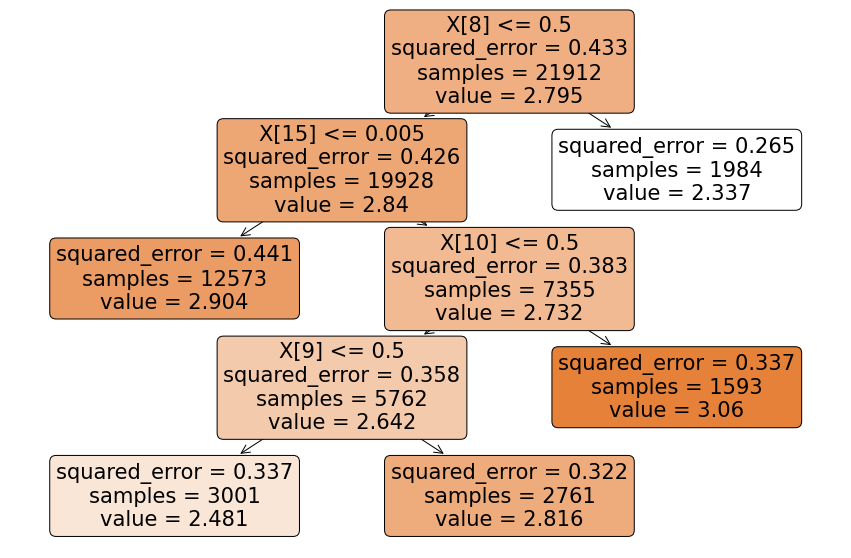

In [67]:
#Tree plot

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree( prune_tree_fit , filled = True , rounded = True  )

In [68]:
list(model_X_basic_train.columns)[8]

'female:hsg'

In [69]:
list(model_X_basic_train.columns)[15]

'female:exp2'

In [70]:
list(model_X_basic_train.columns)[10]

'female:ad'

In [71]:
list(model_X_basic_train.columns)[9]

'female:cg'

In [72]:
y_hat_pt = prune_tree_fit.predict(model_X_basic_test)

# MSE of prune tree

MSE_pt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_pt.reshape(-1,1))**2 ) , np.ones( y_hat_pt.shape )  ).fit().summary2().tables[1].round(3)

# R squared using prune tree

R2_pt = 1- MSE_pt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_pt}")

R^2 using prune tree: 0.10368130932477793


### Results

In [73]:
table= np.zeros( (14, 3) )
table[0,0:2]   = MSE_lm_basic
table[1,0:2]   = MSE_lm_flex
table[2,0:2]   = MSE_lasso.iloc[0, [0, 1]]
table[3,0:2]   = MSE_lasso_post.iloc[0, [0, 1]]
table[4,0:2]   = MSE_lasso_flex.iloc[0, [0, 1]]
table[5,0:2]   = MSE_lasso_post_flex.iloc[0, [0, 1]]
table[6,0:2]   = MSE_lasso_cv_basic.iloc[0, [0, 1]]
table[7,0:2]   = MSE_ridge_basic.iloc[0, [0, 1]]
table[8,0:2]   = MSE_elnet_basic.iloc[0, [0, 1]]
table[9,0:2]   = MSE_lasso_cv_flex.iloc[0, [0, 1]]
table[10,0:2]  = MSE_ridge_flex.iloc[0, [0, 1]]
table[11,0:2]  = MSE_elnet_flex.iloc[0, [0, 1]]
table[12,0:2]  = MSE_tree.iloc[0, [0, 1]]
table[13,0:2]  = MSE_pt.iloc[0, [0, 1]]



table[0,2]   = R2_lm_basic
table[1,2]   = R2_lm_flex
table[2,2]   = R2_lasso
table[3,2]   = R2_lasso_post
table[4,2]   = R2_lasso_flex
table[5,2]   = R2_lasso_post_flex
table[6,2]   = R2_lasso_cv_basic
table[7,2]   = R2_ridge_basic
table[8,2]   = R2_elnet_basic
table[9,2]   = R2_lasso_cv_flex
table[10,2]  = R2_ridge_flex
table[11,2]  = R2_elnet_flex
table[12,2]  = R2_tree
table[13,2]  = R2_pt




colnames_table= ["MSE", "S_E_ for MSE", "R-squared"]
rownames_table= ["Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", \
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)"
                    ,"Unpruned Tree", "Pruned Tree"]
table_pandas = pd.DataFrame( table, columns = colnames_table )
table_pandas.index = rownames_table

table_pandas = table_pandas.round(3)
table_html = table_pandas.to_latex()
table_pandas

C:\Users\Alvaro\AppData\Local\Temp/ipykernel_26668/3085057259.py:45: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_html = table_pandas.to_latex()


,MSE,S_E_ for MSE,R-squared
Least Squares (basic),0.403,0.022,0.119
Least Squares (flexible),0.347,0.022,0.242
Lasso,0.405,0.022,0.115
Post-Lasso,0.405,0.022,0.115
Lasso (flexible),0.349,0.022,0.115
Post-Lasso (flexible),0.350,0.022,0.235
Cross-Validated lasso,0.403,0.022,0.001
Cross-Validated ridge,0.457,0.022,0.119
Cross-Validated elnet,0.404,0.022,0.117
Cross-Validated lasso (flexible),0.348,0.022,0.005


In [74]:
table_pandas.MSE.sort_values(ascending=True)

Least Squares (flexible)            0.347
Cross-Validated lasso (flexible)    0.348
Cross-Validated elnet (flexible)    0.348
Lasso (flexible)                    0.349
Post-Lasso (flexible)               0.350
Least Squares (basic)               0.403
Cross-Validated lasso               0.403
Cross-Validated elnet               0.404
Lasso                               0.405
Post-Lasso                          0.405
Pruned Tree                         0.410
Unpruned Tree                       0.437
Cross-Validated ridge (flexible)    0.455
Cross-Validated ridge               0.457
Name: MSE, dtype: float64

### Conclusions:
The methods with the lowest MSE are Cross Validated Elastic Net and the Cross Validated lasso. Both using the Flexible Model and their MSE = 0.316.
The second best methods are OLS (flexible), Lasso (flexible) and Post-Lasso (flexible). These 3 methods have a MSE = 0.317.

# Tree Regression 

Usually, to make regressions we assume a linear relation between variables. In the case where clusters might be found in the data, a linear regression is not the best way to estimate a prediction model. The best way is to use a Tree regression since it captures non-linear relations between the Y and the X regressors. For instance, a regression tree allows us to make a prediction using continuous or categorical variables. However, a regression tree always tries to predict a continuous value. 
The main concept of regression tree (also classifier tree) is to split the data in a binary criterion until it reaches pure leaf. Finally, each leaf represents a relevant cluster in our dataset. This allows to predict a in which group a new observation in the data corresponds by following the conditions node by node. 

The first step consists in determine under which value we split the first node. Therefore, we need to find the best splitting condition. For this step the computer tests each possible value to split the data and propose a set of candidates. In a scenario with multiple covariates, the algorithm evaluates each covariate one at time, and for each covariate estimates the proper split value by choosing the one with lowest sum squared errors. The variable that goes in the first node is the one with the lowest sum squared errors. This process repeats for each node. 

This step repeats for each possible split. However, the number of final leaves will depend on if it is needed to do an extra split in each leaf. This process can result in an overfitting of the data and the model can´t be generalize. To solve this, we have to prune the tree by setting penalization parameters on the impurities of the leaf.

First, we have to determine the optimal complexity of the tree. To do this we set the algorithm to prune or “cut” the leaf with a relatively small alpha. The smallest alphas are pruned first. We set an algorithm that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. Larger alphas mean more of the tree is pruned, which increases the total impurity of its leaves.

Next, we make a cross validation process for al the alphas proposed and calculate the accuracy mean for each alpha. The optimal alpha for our tree would be the one with the lowest mean accuracy rate. 

Finally. We set that value of alpha in the DecisionTreeRegressor function in Python to get our optimal depth and number of leaves. 

